Tarefa 7 Regressão no kaggle:
https://www.kaggle.com/c/house-prices-advanced-regression-techniques
1. Construa um modelo com Random Forest
2. Construe um modelo com LightGBM
3. Faça um Ensemble


https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard

In [ ]:
#Configuration environment
import os

os.environ['KAGGLE_USERNAME'] = "sheilamonteiro" # username from the json file
os.environ['KAGGLE_KEY'] = "fdad8ab256e18aa4df58f629b48fb1ce" # key from the json file

! mkdir 'House_Price'

! kaggle competitions download -c house-prices-advanced-regression-techniques -p '/content/House_Price'

  0% 0.00/13.1k [00:00<?, ?B/s]
100% 13.1k/13.1k [00:00<00:00, 28.2MB/s]
  0% 0.00/450k [00:00<?, ?B/s]
100% 450k/450k [00:00<00:00, 63.0MB/s]
  0% 0.00/441k [00:00<?, ?B/s]
100% 441k/441k [00:00<00:00, 58.4MB/s]
  0% 0.00/31.2k [00:00<?, ?B/s]
100% 31.2k/31.2k [00:00<00:00, 14.4MB/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn


#importing dataframe 
df = pd.read_csv('/content/House_Price/train.csv').drop(['Id'],axis=1)

df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# **Pré-Processamento dos Dados**

## **Lidando com Valores Faltantes**


Definindo uma função para imprimir valores faltantes:

In [ ]:
print(f'Dataframe Shape: {df.shape}\n')

print('Number of Missing Values per Feature:\n')

for i in list(df):
  if df[i].isnull().sum() != 0:
    print(f'{i} ({df[i].dtypes}) - {df[i].isnull().sum()}')


Dataframe Shape: (1460, 80)

Number of Missing Values per Feature:

LotFrontage (float64) - 259
Alley (object) - 1369
MasVnrType (object) - 8
MasVnrArea (float64) - 8
BsmtQual (object) - 37
BsmtCond (object) - 37
BsmtExposure (object) - 38
BsmtFinType1 (object) - 37
BsmtFinType2 (object) - 38
Electrical (object) - 1
FireplaceQu (object) - 690
GarageType (object) - 81
GarageYrBlt (float64) - 81
GarageFinish (object) - 81
GarageQual (object) - 81
GarageCond (object) - 81
PoolQC (object) - 1453
Fence (object) - 1179
MiscFeature (object) - 1406


Os dados categóricos faltantes correspondem a *features* que as residências não possuem. Por exemplo: Casas sem cerca (Fence) são atribuidos valores *Nan* para esse *feature*. Portanto convém substituir *Nan* pelo valor categórico '*None*'.

In [ ]:
null = []

# Appending features with missing values
for i in list(df):
  if df[i].isnull().sum() != 0:
    null.append(i)

# Visualizing columns with missing values
df[null]

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,65.0,NaN,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA,NaN,NaN,NaN
1,80.0,NaN,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA,NaN,NaN,NaN
2,68.0,NaN,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA,NaN,NaN,NaN
3,60.0,NaN,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA,NaN,NaN,NaN
4,84.0,NaN,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,NaN,None,0.0,Gd,TA,No,Unf,Unf,SBrkr,TA,Attchd,1999.0,RFn,TA,TA,NaN,NaN,NaN
1456,85.0,NaN,Stone,119.0,Gd,TA,No,ALQ,Rec,SBrkr,TA,Attchd,1978.0,Unf,TA,TA,NaN,MnPrv,NaN
1457,66.0,NaN,None,0.0,TA,Gd,No,GLQ,Unf,SBrkr,Gd,Attchd,1941.0,RFn,TA,TA,NaN,GdPrv,Shed
1458,68.0,NaN,None,0.0,TA,TA,Mn,GLQ,Rec,FuseA,NaN,Attchd,1950.0,Unf,TA,TA,NaN,NaN,NaN


In [ ]:
fill_null = []

# Appending categorical features with missing values to the list fill_null
for i in null:
  if i not in ['GarageYrBlt','MasVnrArea','LotFrontage']:
    fill_null.append(i)

In [ ]:
data = df.copy()  # Copying the original train dataframe

# Filling categorical missing data with None 
data[fill_null] = data[fill_null].fillna('None')

# Filling non categorical missing data with 0
data = data.fillna(0)

## **Excluindo Colunas**

Fence, Miscfeatures, poolqc, alley

variaveis com muita correlação: 1stflr e totalbsmt, garage area e garage car, totrms e grliv

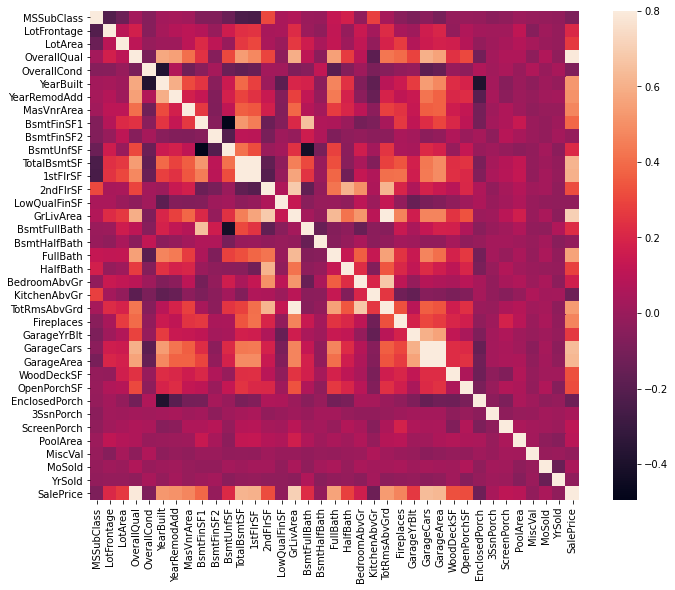

In [ ]:
#correlation matrix
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sbn.heatmap(corrmat, vmax=.8, square=True);

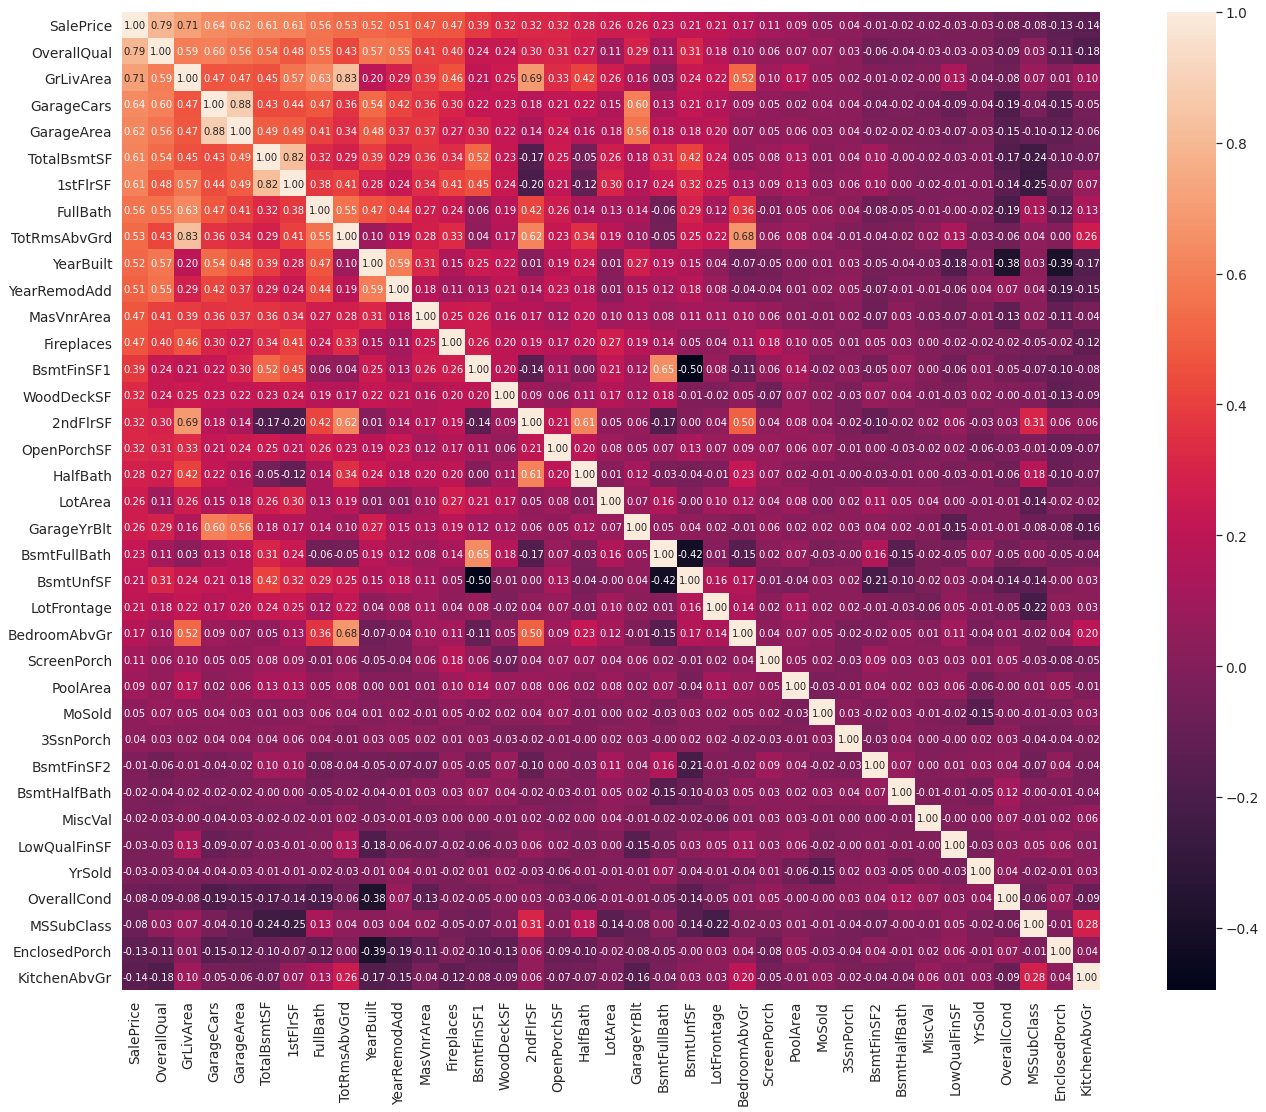

In [ ]:
#saleprice correlation matrix
k = 40 #number of variables for heatmap
f, ax = plt.subplots(figsize=(24, 18))
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data[cols].values.T)
sbn.set(font_scale=1.25)
hm = sbn.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Variáveis altamente correlacionadas:

In [ ]:
drop = []

for i in list(data):
  n = data[i].value_counts().max()/data.shape[0]
  if n > 0.98:
    print(f'{i} - {n}')
    drop.append(i)

print(len(drop))

Street - 0.9958904109589041
Utilities - 0.9993150684931507
Condition2 - 0.9897260273972602
RoofMatl - 0.9821917808219178
LowQualFinSF - 0.9821917808219178
3SsnPorch - 0.9835616438356164
PoolArea - 0.9952054794520548
PoolQC - 0.9952054794520548
8


Variáveis altamente correlacionadas:

In [ ]:
for i in range(len(cm)):

  for j in range(len(cm)):
    if cm[i][j]>0.8 and cols[i]!=cols[j]:
      print(f'{cols[i]},{cols[j]} - {cm[i][j]}')


GrLivArea,TotRmsAbvGrd - 0.8254893743088426
GarageCars,GarageArea - 0.8824754142814625
GarageArea,GarageCars - 0.8824754142814625
TotalBsmtSF,1stFlrSF - 0.8195299750050337
1stFlrSF,TotalBsmtSF - 0.8195299750050337
TotRmsAbvGrd,GrLivArea - 0.8254893743088427


In [ ]:
drop_1 = drop.copy()

drop_1.extend(['TotRmsAbvGrd','GarageArea','TotalBsmtSF','MiscFeature'])
drop_1

['Street',
 'Utilities',
 'Condition2',
 'RoofMatl',
 'LowQualFinSF',
 '3SsnPorch',
 'PoolArea',
 'PoolQC',
 'TotRmsAbvGrd',
 'GarageArea',
 'TotalBsmtSF',
 'MiscFeature']

Excluindo outras colunas:

In [ ]:
drop_2 = drop_1.copy()

for j in range(len(cm)):
  n = cm[0][j]
  if n < 0.01:
    drop_2.append(cols[j])

print(f'Number of fetures to drop: {len(drop_2)}\n')
drop_2


Number of fetures to drop: 21



['Street',
 'Utilities',
 'Condition2',
 'RoofMatl',
 'LowQualFinSF',
 '3SsnPorch',
 'PoolArea',
 'PoolQC',
 'TotRmsAbvGrd',
 'GarageArea',
 'TotalBsmtSF',
 'MiscFeature',
 'BsmtFinSF2',
 'BsmtHalfBath',
 'MiscVal',
 'LowQualFinSF',
 'YrSold',
 'OverallCond',
 'MSSubClass',
 'EnclosedPorch',
 'KitchenAbvGr']

In [ ]:
data_drop = data.copy().drop(drop_2,axis=1)

data_drop

,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,ScreenPorch,Fence,MoSold,SaleType,SaleCondition,SalePrice
0,RL,65.0,8450,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,150,GasA,Ex,Y,SBrkr,856,854,1710,1,2,1,3,Gd,Typ,0,None,Attchd,2003.0,RFn,2,TA,TA,Y,0,61,0,None,2,WD,Normal,208500
1,RL,80.0,9600,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,284,GasA,Ex,Y,SBrkr,1262,0,1262,0,2,0,3,TA,Typ,1,TA,Attchd,1976.0,RFn,2,TA,TA,Y,298,0,0,None,5,WD,Normal,181500
2,RL,68.0,11250,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,434,GasA,Ex,Y,SBrkr,920,866,1786,1,2,1,3,Gd,Typ,1,TA,Attchd,2001.0,RFn,2,TA,TA,Y,0,42,0,None,9,WD,Normal,223500
3,RL,60.0,9550,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,540,GasA,Gd,Y,SBrkr,961,756,1717,1,1,0,3,Gd,Typ,1,Gd,Detchd,1998.0,Unf,3,TA,TA,Y,0,35,0,None,2,WD,Abnorml,140000
4,RL,84.0,14260,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,490,GasA,Ex,Y,SBrkr,1145,1053,2198,1,2,1,4,Gd,Typ,1,TA,Attchd,2000.0,RFn,3,TA,TA,Y,192,84,0,None,12,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,62.0,7917,None,Reg,Lvl,Inside,Gtl,Gilbert,Norm,1Fam,2Story,6,1999,2000,Gable,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,953,GasA,Ex,Y,SBrkr,953,694,1647,0,2,1,3,TA,Typ,1,TA,Attchd,1999.0,RFn,2,TA,TA,Y,0,40,0,None,8,WD,Normal,175000
1456,RL,85.0,13175,None,Reg,Lvl,Inside,Gtl,NWAmes,Norm,1Fam,1Story,6,1978,1988,Gable,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,589,GasA,TA,Y,SBrkr,2073,0,2073,1,2,0,3,TA,Min1,2,TA,Attchd,1978.0,Unf,2,TA,TA,Y,349,0,0,MnPrv,2,WD,Normal,210000
1457,RL,66.0,9042,None,Reg,Lvl,Inside,Gtl,Crawfor,Norm,1Fam,2Story,7,1941,2006,Gable,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,877,GasA,Ex,Y,SBrkr,1188,1152,2340,0,2,0,4,Gd,Typ,2,Gd,Attchd,1941.0,RFn,1,TA,TA,Y,0,60,0,GdPrv,5,WD,Normal,266500
1458,RL,68.0,9717,None,Reg,Lvl,Inside,Gtl,NAmes,Norm,1Fam,1Story,5,1950,1996,Hip,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,0,GasA,Gd,Y,FuseA,1078,0,1078,1,1,0,2,Gd,Typ,0,None,Attchd,1950.0,Unf,1,TA,TA,Y,366,0,0,None,4,WD,Normal,142125


In [ ]:
p = 0
for i in range(len(data)):
  if data['Exterior1st'][i] == data['Exterior2nd'][i]:
    p += 1

print(p)

#fazer teste chi quadrado para analise de correlação entre variaveis categoricas


1245


## **Tratando Dados Categóricos**

In [ ]:
data.dtypes.value_counts()

object     43
int64      34
float64     3
dtype: int64

In [ ]:
# Selecting categorical features
categorical_features = list(data.select_dtypes(include=['object']))
data.select_dtypes(include=['object']).head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,None,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
1,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
2,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
3,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,None,None,None,WD,Abnorml
4,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal


In [ ]:
from sklearn.preprocessing import OneHotEncoder

data = data.copy()
enc = OneHotEncoder(handle_unknown='ignore')

enc.fit(data[categorical_features])

data_categorical = pd.DataFrame(enc.transform(data[categorical_features]).toarray())
data_categorical.columns = enc.get_feature_names(categorical_features)

data_categorical.shape

(1460, 267)

In [ ]:
data_dropped = data.copy().drop(categorical_features,axis = 1)
data_train = pd.concat([data_dropped, data_categorical], axis=1)

data_train.shape

(1460, 304)

In [ ]:
data_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,...,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## **Separando em Conjunto de Treino e Validação**

In [ ]:

from sklearn.model_selection import train_test_split

X = data_train.drop(['SalePrice'],axis=1)
y = data_train['SalePrice']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

Reescalando features:

In [ ]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler().fit(X_train)

X_train = pd.DataFrame(min_max_scaler.transform(X_train),columns = X_train.columns)
X_val = pd.DataFrame(min_max_scaler.transform(X_val),columns = X_train.columns)

## **Configurando Modelo**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor()
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
regr.score(X_val,y_val)

0.831059124989039

# **Conjunto de Teste**

In [ ]:
#importing dataframe 
df_test = pd.read_csv('/content/House_Price/test.csv')

df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# **Pré-Processamento dos Dados**

## **Lidando com Valores Faltantes**


In [ ]:
print(f'Dataframe Shape: {df_test.shape}\n')

print('Number of Missing Values per Feature:\n')

for i in list(df_test):
  if df_test[i].isnull().sum() != 0:
    print(f'{i} - {df_test[i].isnull().sum()}')

Dataframe Shape: (1459, 80)

Number of Missing Values per Feature:

MSZoning - 4
LotFrontage - 227
Alley - 1352
Utilities - 2
Exterior1st - 1
Exterior2nd - 1
MasVnrType - 16
MasVnrArea - 15
BsmtQual - 44
BsmtCond - 45
BsmtExposure - 44
BsmtFinType1 - 42
BsmtFinSF1 - 1
BsmtFinType2 - 42
BsmtFinSF2 - 1
BsmtUnfSF - 1
TotalBsmtSF - 1
BsmtFullBath - 2
BsmtHalfBath - 2
KitchenQual - 1
Functional - 2
FireplaceQu - 730
GarageType - 76
GarageYrBlt - 78
GarageFinish - 78
GarageCars - 1
GarageArea - 1
GarageQual - 78
GarageCond - 78
PoolQC - 1456
Fence - 1169
MiscFeature - 1408
SaleType - 1


In [ ]:
null_test = []

# Appending features with missing values
for i in list(df_test):
  if df_test[i].isnull().sum() != 0:
    null_test.append(i)

# Visualizing columns with missing values
df_test[null_test].head()

,MSZoning,LotFrontage,Alley,Utilities,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,KitchenQual,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType
0,RH,80.0,NaN,AllPub,VinylSd,VinylSd,None,0.0,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,0.0,0.0,TA,Typ,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,NaN,MnPrv,NaN,WD
1,RL,81.0,NaN,AllPub,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,0.0,0.0,Gd,Typ,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,NaN,NaN,Gar2,WD
2,RL,74.0,NaN,AllPub,VinylSd,VinylSd,None,0.0,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,0.0,0.0,TA,Typ,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,NaN,MnPrv,NaN,WD
3,RL,78.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,20.0,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,0.0,0.0,Gd,Typ,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,NaN,NaN,NaN,WD
4,RL,43.0,NaN,AllPub,HdBoard,HdBoard,None,0.0,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,0.0,0.0,Gd,Typ,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,NaN,NaN,NaN,WD


In [ ]:
df_test.dtypes.value_counts()

object     43
int64      26
float64    11
dtype: int64

In [ ]:
fill_null_test = []

for i in list(df_test.select_dtypes(include=['object'])):
  if df_test[i].isnull().sum() != 0:
    fill_null_test.append(i)

df_test[fill_null_test].head()

MSZoning - 4
Alley - 1352
Utilities - 2
Exterior1st - 1
Exterior2nd - 1
MasVnrType - 16
BsmtQual - 44
BsmtCond - 45
BsmtExposure - 44
BsmtFinType1 - 42
BsmtFinType2 - 42
KitchenQual - 1
Functional - 2
FireplaceQu - 730
GarageType - 76
GarageFinish - 78
GarageQual - 78
GarageCond - 78
PoolQC - 1456
Fence - 1169
MiscFeature - 1408
SaleType - 1


,MSZoning,Alley,Utilities,Exterior1st,Exterior2nd,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType
0,RH,NaN,AllPub,VinylSd,VinylSd,None,TA,TA,No,Rec,LwQ,TA,Typ,NaN,Attchd,Unf,TA,TA,NaN,MnPrv,NaN,WD
1,RL,NaN,AllPub,Wd Sdng,Wd Sdng,BrkFace,TA,TA,No,ALQ,Unf,Gd,Typ,NaN,Attchd,Unf,TA,TA,NaN,NaN,Gar2,WD
2,RL,NaN,AllPub,VinylSd,VinylSd,None,Gd,TA,No,GLQ,Unf,TA,Typ,TA,Attchd,Fin,TA,TA,NaN,MnPrv,NaN,WD
3,RL,NaN,AllPub,VinylSd,VinylSd,BrkFace,TA,TA,No,GLQ,Unf,Gd,Typ,Gd,Attchd,Fin,TA,TA,NaN,NaN,NaN,WD
4,RL,NaN,AllPub,HdBoard,HdBoard,None,Gd,TA,No,ALQ,Unf,Gd,Typ,NaN,Attchd,RFn,TA,TA,NaN,NaN,NaN,WD


Preenchendo valores *Nan* com *None* para os daddos categóricos:

In [ ]:
data_test = df_test.copy().drop(['Id'],axis=1)
data_test[fill_null_test] =  data_test[fill_null_test].fillna('None')

Visualizando dados numéricos faltantes:

In [ ]:
print(f'Dataframe Shape: {data_test.shape}\n')

print('Number of Missing Values per Feature:\n')

fill_num = []

for i in list(data_test):
  if data_test[i].isnull().sum() != 0:
    print(f'{i} - {data_test[i].isnull().sum()}')
    fill_num.append(i)

else:
  print('---No missing values---\n')

data_test[fill_num].head()

Dataframe Shape: (1459, 79)

Number of Missing Values per Feature:

LotFrontage - 227
MasVnrArea - 15
BsmtFinSF1 - 1
BsmtFinSF2 - 1
BsmtUnfSF - 1
TotalBsmtSF - 1
BsmtFullBath - 2
BsmtHalfBath - 2
GarageYrBlt - 78
GarageCars - 1
GarageArea - 1


,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,GarageArea
0,80.0,0.0,468.0,144.0,270.0,882.0,0.0,0.0,1961.0,1.0,730.0
1,81.0,108.0,923.0,0.0,406.0,1329.0,0.0,0.0,1958.0,1.0,312.0
2,74.0,0.0,791.0,0.0,137.0,928.0,0.0,0.0,1997.0,2.0,482.0
3,78.0,20.0,602.0,0.0,324.0,926.0,0.0,0.0,1998.0,2.0,470.0
4,43.0,0.0,263.0,0.0,1017.0,1280.0,0.0,0.0,1992.0,2.0,506.0


Preenchendo valores *Nan* como 0, para dados numéricos:

In [ ]:
data_test[fill_num] = data_test[fill_num].fillna(0)

print(f'Dataframe Shape: {data_test.shape}\n')

print('Number of Missing Values per Feature:\n')

for i in list(data_test):
  if data_test[i].isnull().sum() != 0:
    print(f'{i} - {data_test[i].isnull().sum()}')

else:
  print('---No missing values---\n')

data_test.head()

Dataframe Shape: (1459, 79)

Number of Missing Values per Feature:

---No missing values---



,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,None,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,None,MnPrv,None,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,None,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,None,None,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,None,MnPrv,None,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,None,None,None,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,None,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,None,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,None,None,None,0,1,2010,WD,Normal


## **Tratando Dados Categóricos**


In [ ]:
# Selecting categorical features
categorical_features_test = list(data_test.select_dtypes(include=['object']))
data_test.select_dtypes(include=['object']).head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RH,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,Rec,LwQ,GasA,TA,Y,SBrkr,TA,Typ,None,Attchd,Unf,TA,TA,Y,None,MnPrv,None,WD,Normal
1,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,None,Attchd,Unf,TA,TA,Y,None,None,Gar2,WD,Normal
2,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Gd,Y,SBrkr,TA,Typ,TA,Attchd,Fin,TA,TA,Y,None,MnPrv,None,WD,Normal
3,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,None,None,None,WD,Normal
4,RL,Pave,None,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,Gable,CompShg,HdBoard,HdBoard,None,Gd,TA,PConc,Gd,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,None,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal


In [ ]:
print(f'Dataframe Shape: {data_test.shape}\n')

print('Number of Missing Values per Feature:\n')

for i in list(data_test):
  if data_test[i].isnull().sum() != 0:
    print(f'{i} - {data_test[i].isnull().sum()}')

else:
  print('---No missing values---\n')

Dataframe Shape: (1459, 79)

Number of Missing Values per Feature:

---No missing values---



In [ ]:
data_test = data_test.copy()


data_categorical_test = pd.DataFrame(enc.transform(data_test[categorical_features_test]).toarray())
data_categorical_test.columns = enc.get_feature_names(categorical_features)

data_categorical_test.shape

(1459, 267)

In [ ]:
data_test_dropped = data_test.copy().drop(categorical_features_test,axis = 1)
X_test = pd.concat([data_test_dropped, data_categorical_test], axis=1)

X_test.shape

(1459, 303)

# **Predição**

In [ ]:
X_test = pd.DataFrame(min_max_scaler.transform(X_test),columns = X_test.columns)

X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,...,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.000000,0.255591,0.048246,0.444444,0.625,0.649635,0.183333,0.0000,0.207080,0.097693,0.115582,0.275625,0.194195,0.000000,0.0,0.129433,0.0,0.0,0.333333,0.0,0.250,0.333333,0.250000,0.000000,0.975622,0.25,0.525180,0.163361,0.000000,0.0,0.0,0.25,0.0,0.000000,0.454545,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.258786,0.060609,0.555556,0.625,0.627737,0.133333,0.0675,0.408407,0.000000,0.173801,0.415313,0.343815,0.000000,0.0,0.229157,0.0,0.0,0.333333,0.5,0.375,0.333333,0.333333,0.000000,0.974129,0.25,0.224460,0.458576,0.065814,0.0,0.0,0.00,0.0,0.806452,0.454545,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.235294,0.236422,0.058566,0.444444,0.500,0.912409,0.800000,0.0000,0.350000,0.000000,0.058647,0.290000,0.205252,0.339467,0.0,0.298250,0.0,0.0,0.666667,0.5,0.375,0.333333,0.333333,0.333333,0.993532,0.50,0.346763,0.247375,0.062157,0.0,0.0,0.00,0.0,0.000000,0.181818,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.235294,0.249201,0.040562,0.555556,0.625,0.919708,0.800000,0.0125,0.266372,0.000000,0.138699,0.289375,0.204561,0.328329,0.0,0.292492,0.0,0.0,0.666667,0.5,0.375,0.333333,0.416667,0.333333,0.994030,0.50,0.338129,0.420070,0.065814,0.0,0.0,0.00,0.0,0.000000,0.454545,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.588235,0.137380,0.017318,0.777778,0.500,0.875912,0.700000,0.0000,0.116372,0.000000,0.435360,0.400000,0.326883,0.000000,0.0,0.217872,0.0,0.0,0.666667,0.0,0.250,0.333333,0.250000,0.000000,0.991045,0.50,0.364029,0.000000,0.149909,0.0,0.0,0.30,0.0,0.000000,0.000000,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
predictions_test = regr.predict(X_test)

In [ ]:
output = pd.DataFrame({'Id': [df_test['Id'].iloc[i] for i in range(len(df_test['Id']))], 'SalePrice': predictions_test})
output.to_csv('submission.csv', index=False)